# FINAL PROJECT
## AIM: PREDICT THE REAL "STATE OF CHARGE" OF THE CAR 


Issue: Li-Ion batteries do not behave linearly, as a racing team we need to know how much energy do we stll have. How much time do we have untill the voltage "drops from the cliff"

# 1. Project setup

In [145]:
# swich to english 
Sys.setenv(LANG = "en")

# prepare environmental variables for the project
WORKING_DIRECTORY <- "C:\\Users\\User\\Desktop\\Studia\\ERASMUS\\DATA_SCIENCE\\FINAL PROJECT\\"
DATASET_PATH <- "datasets\\"

# Files names 
RACE_2021 <- "RACETRACK_2021_DATA\\18-09-2021_THE_RACE_24H.csv"
FIRST_TESTS <- "RACETRACK_2021_DATA\\16-09-2021_FIRST_TEST_2H_NO_GEOMETRY.csv"
#SECOND_TEST <- "DATA NOT AVAILABLE YET"

# import important libraries
library('ggplot2')
library('gridExtra')
library('reshape2')
library(plyr)

# 2. Load the data

In [122]:
race_2021_df <- read.csv(
    paste(WORKING_DIRECTORY, DATASET_PATH, RACE_2021, sep=''),
    header=TRUE, 
    sep=';')
head(race_2021_df, 10)

X_id,X_t,General.Timestamp,General.ReceivedTime,General.ThrottlePosition,General.MotorController,General.MainSwitch,General.MotorDirection,General.PowerEco,General.RegenerationBrake,...,RawBytes.285,RawBytes.286,RawBytes.287,RawBytes.288,RawBytes.289,RawBytes.290,RawBytes.291,RawBytes.292,RawBytes.293,RawBytes.294
6145c6b1f02fbf4eb5a5759c,RecentCar,18.09.2021 13:00,18.09.2021 13:00,0,5,PRAWDA,FAŁSZ,PRAWDA,0,...,215,163,112,61,10,215,211,63,3,2
6145c6b2f02fbf4eb5a5759d,RecentCar,18.09.2021 13:00,18.09.2021 13:00,0,5,PRAWDA,FAŁSZ,PRAWDA,0,...,215,163,112,61,10,215,211,63,3,2
6145c6b3f02fbf4eb5a5759e,RecentCar,18.09.2021 13:00,18.09.2021 13:00,0,5,PRAWDA,FAŁSZ,PRAWDA,0,...,215,163,112,61,10,215,211,63,3,2
6145c6b4f02fbf4eb5a5759f,RecentCar,18.09.2021 13:00,18.09.2021 13:00,0,5,PRAWDA,FAŁSZ,PRAWDA,0,...,215,163,112,61,10,215,211,63,3,2
6145c6b5f02fbf4eb5a575a0,RecentCar,18.09.2021 13:00,18.09.2021 13:00,0,5,PRAWDA,FAŁSZ,PRAWDA,0,...,215,163,112,61,10,215,211,63,3,2
6145c6b6f02fbf4eb5a575a1,RecentCar,18.09.2021 13:00,18.09.2021 13:00,0,5,PRAWDA,FAŁSZ,PRAWDA,0,...,215,163,112,61,10,215,211,63,3,2
6145c6b7f02fbf4eb5a575a2,RecentCar,18.09.2021 13:00,18.09.2021 13:00,0,5,PRAWDA,FAŁSZ,PRAWDA,0,...,215,163,112,61,10,215,211,63,3,2
6145c6b8f02fbf4eb5a575a3,,18.09.2021 13:00,18.09.2021 13:00,0,5,PRAWDA,FAŁSZ,PRAWDA,0,...,215,163,112,61,10,215,211,63,3,2
6145c6b9f02fbf4eb5a575a4,RecentCar,18.09.2021 13:00,18.09.2021 13:00,0,5,PRAWDA,FAŁSZ,PRAWDA,0,...,215,163,112,61,10,215,211,63,3,2
6145c6baf02fbf4eb5a575a5,RecentCar,18.09.2021 13:00,18.09.2021 13:00,0,5,PRAWDA,FAŁSZ,PRAWDA,0,...,215,163,112,61,10,215,211,63,3,2


# 2.1. Data cleaning - based on the team knowledge
Based on the experience of the team, we are able to drop lots of columns which do not influence the final result of the project - State Of Charge analysis

In [123]:
ncol(race_2021_df)

[1] 490

__We have more than 490 columns - many of them are useless in case of data analys, lets drop the ones which do not have important information for us__

In [124]:
names <- colnames(race_2021_df)
cat(names, sep="\n")

X_id
X_t
General.Timestamp
General.ReceivedTime
General.ThrottlePosition
General.MotorController
General.MainSwitch
General.MotorDirection
General.PowerEco
General.RegenerationBrake
General.CruiseThrottle
General.CruiseDesiredSpeed
General.BatteryError
General.EngineError
General.DriveMode
General.CruiseEngaged
General.Horn
General.HandBrake
General.Temperatures.0
General.Temperatures.1
General.Temperatures.2
General.Temperatures.3
General.Rpm
General.SolarRadiance
General.Speed
General.Mileage
General.MotorTemperature
Battery.RemainingChargeTime
Battery.ChargerEnabled
Battery.SystemState
Battery.InputOutputState
Battery.PackCRate
Battery.StateOfCharge
Battery.StateOfHealth
Battery.NumberOfCellsConnected
Battery.RemainingEnergy
Battery.DeviationOfVoltageInCells
Battery.PackTemperatureMax
Battery.LMUNumberWithMaxTemperature
Battery.PackTemperatureMin
Battery.LMUNumberWithMinTemperature
Battery.CellVoltageMax
Battery.CellNumberWithMaxVoltage
Battery.CellVoltageMin
Battery.CellNumberWithM

In [125]:
# Drop columns with Row Bytes (it is just a backup in case of data parsing failure)
race_2021_clean_df = race_2021_df[,!grepl("^RawBytes",names(race_2021_df))]

# Drop columns with Tyres (due to lack of hardware)
race_2021_clean_df = race_2021_clean_df[,!grepl("^Tires",names(race_2021_clean_df))]

# Drop GPS data (due to failure during 18-19 September ONLY)
race_2021_clean_df = race_2021_clean_df[,!grepl("^Gps",names(race_2021_clean_df))]

# Drop columns with warnings - as they are based on numerical values received in the data
race_2021_clean_df = race_2021_clean_df[,!grepl("^Battery.Warnings",names(race_2021_clean_df))]

# Drop columns with errors - as they are based on numerical values received in the data
race_2021_clean_df = race_2021_clean_df[,!grepl("^Battery.Errors",names(race_2021_clean_df))]

# Drop columns with lights - as they does not influence the final result due to negligible power impact
race_2021_clean_df = race_2021_clean_df[,!grepl("^Lights",names(race_2021_clean_df))]

# Other columns containing misleading / failed information
cols_to_drop <- c(
    "X_id",  # DB ID
    "X_t",    # DB Info
    "General.ReceivedTime",          # Redundant with General.Timestamp
    "General.CruiseThrottle",        # Not used during the race
    "General.CruiseDesiredSpeed",    # Not used during the race
    "General.EngineError",           # Not implemented
    "General.CruiseEngaged",         # Not used during the race
    "General.HandBrake",             # Probably not working - Verify
    "General.Temperatures.0",        # Not implemented           
    "General.Temperatures.1",        # Not implemented
    "General.Temperatures.2",        # Not implemented
    "General.Temperatures.3",        # Not implemented
    "General.SolarRadiance",         # Not implemented
    "General.BatteryError",          # Not implemented
    "LeftEngine",                    # Not implemented
    "RightEngine",                   # Not implemented
    "Solar.MpptPcbTemperature.0",    # Not implemented
    "Solar.MpptPcbTemperature.1",    # Not implemented
    "Solar.MpptPcbTemperature.2",    # Not implemented
    "Solar.MpptPcbTemperature.3",    # Not implemented
    "Solar.MpptMosfetTemperature.0", # Not implemented
    "Solar.MpptMosfetTemperature.1", # Not implemented
    "Solar.MpptMosfetTemperature.2", # Not implemented
    "Solar.MpptMosfetTemperature.3"  # Not implemented
)

race_2021_clean_df = race_2021_clean_df[,!(names(race_2021_clean_df) %in% cols_to_drop)]

In [126]:
# Print the available columns
ncol(race_2021_clean_df)
names_clean <- colnames(race_2021_clean_df)
# cat(names_clean, sep="\n")
# summary(race_2021_clean_df)

[1] 100

## THE MOST USELESS COLUMNS HAS BEEN DROPPED, BUT...
If we run the function summary() we will see, that there are lots of column with only one value (for example errors and warnings - if there is a warning or error which has at least one TRUE / PRAWDA - than this variable may be usefull - the rest - useless for us

# 4. TO DO - DATA CLEANING

## 4.1 - Data translation 
As the data was collected in Polish - a few variables should be translated (booleans for example)

In [127]:
str(race_2021_clean_df)

'data.frame':	72471 obs. of  100 variables:
 $ General.Timestamp                                : Factor w/ 1392 levels "18.09.2021 13:00",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ General.ThrottlePosition                         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ General.MotorController                          : int  5 5 5 5 5 5 5 5 5 5 ...
 $ General.MainSwitch                               : Factor w/ 2 levels "FAŁSZ","PRAWDA": 2 2 2 2 2 2 2 2 2 2 ...
 $ General.MotorDirection                           : Factor w/ 2 levels "FAŁSZ","PRAWDA": 1 1 1 1 1 1 1 1 1 1 ...
 $ General.PowerEco                                 : Factor w/ 2 levels "FAŁSZ","PRAWDA": 2 2 2 2 2 2 2 2 2 2 ...
 $ General.RegenerationBrake                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ General.DriveMode                                : int  2 2 2 2 2 2 2 2 2 2 ...
 $ General.Horn                                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ General.Rpm                                      : int  0 0 0 0 0 0 0 

In [128]:
head(race_2021_clean_df)

General.Timestamp,General.ThrottlePosition,General.MotorController,General.MainSwitch,General.MotorDirection,General.PowerEco,General.RegenerationBrake,General.DriveMode,General.Horn,General.Rpm,...,Solar.MpptInputCurrent.3,Solar.MpptOutputVoltage.0,Solar.MpptOutputVoltage.1,Solar.MpptOutputVoltage.2,Solar.MpptOutputVoltage.3,Solar.MpptOutputPower.0,Solar.MpptOutputPower.1,Solar.MpptOutputPower.2,Solar.MpptOutputPower.3,Solar.PowerMppt
18.09.2021 13:00,0,5,PRAWDA,FAŁSZ,PRAWDA,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991
18.09.2021 13:00,0,5,PRAWDA,FAŁSZ,PRAWDA,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991
18.09.2021 13:00,0,5,PRAWDA,FAŁSZ,PRAWDA,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991
18.09.2021 13:00,0,5,PRAWDA,FAŁSZ,PRAWDA,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991
18.09.2021 13:00,0,5,PRAWDA,FAŁSZ,PRAWDA,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991
18.09.2021 13:00,0,5,PRAWDA,FAŁSZ,PRAWDA,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991


In [129]:
race_2021_clean_df[] <- lapply(
    race_2021_clean_df, 
    function(x) 
        if(all(x %in% c('PRAWDA', 'FAŁSZ'), na.rm = TRUE)) x == 'PRAWDA' else x)

In [130]:
str(race_2021_clean_df)

'data.frame':	72471 obs. of  100 variables:
 $ General.Timestamp                                : Factor w/ 1392 levels "18.09.2021 13:00",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ General.ThrottlePosition                         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ General.MotorController                          : int  5 5 5 5 5 5 5 5 5 5 ...
 $ General.MainSwitch                               : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ General.MotorDirection                           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ General.PowerEco                                 : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ General.RegenerationBrake                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ General.DriveMode                                : int  2 2 2 2 2 2 2 2 2 2 ...
 $ General.Horn                                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ General.Rpm                                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ General.Speed                               

In [131]:
head(race_2021_clean_df)

General.Timestamp,General.ThrottlePosition,General.MotorController,General.MainSwitch,General.MotorDirection,General.PowerEco,General.RegenerationBrake,General.DriveMode,General.Horn,General.Rpm,...,Solar.MpptInputCurrent.3,Solar.MpptOutputVoltage.0,Solar.MpptOutputVoltage.1,Solar.MpptOutputVoltage.2,Solar.MpptOutputVoltage.3,Solar.MpptOutputPower.0,Solar.MpptOutputPower.1,Solar.MpptOutputPower.2,Solar.MpptOutputPower.3,Solar.PowerMppt
18.09.2021 13:00,0,5,TRUE,FALSE,TRUE,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991
18.09.2021 13:00,0,5,TRUE,FALSE,TRUE,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991
18.09.2021 13:00,0,5,TRUE,FALSE,TRUE,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991
18.09.2021 13:00,0,5,TRUE,FALSE,TRUE,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991
18.09.2021 13:00,0,5,TRUE,FALSE,TRUE,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991
18.09.2021 13:00,0,5,TRUE,FALSE,TRUE,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991


## 4.2 -  Data cleaning 

In [133]:
summary(race_2021_clean_df)

        General.Timestamp General.ThrottlePosition General.MotorController
 19.09.2021 11:49:   89   Min.   :  0.00           Min.   :0.000          
 19.09.2021 11:45:   83   1st Qu.:  0.00           1st Qu.:1.000          
 19.09.2021 11:57:   79   Median : 82.00           Median :1.000          
 18.09.2021 15:36:   77   Mean   : 99.77           Mean   :2.705          
 18.09.2021 16:43:   76   3rd Qu.:255.00           3rd Qu.:5.000          
 18.09.2021 14:21:   75   Max.   :255.00           Max.   :5.000          
 (Other)         :71992                                                   
 General.MainSwitch General.MotorDirection General.PowerEco
 Mode :logical      Mode :logical          Mode :logical   
 FALSE:640          FALSE:70026            FALSE:42641     
 TRUE :71831        TRUE :2445             TRUE :29830     
                                                           
                                                           
                                        

In [134]:
# Besed on information from summary drop columns with no value
cols_to_drop <- c(
    "Battery.ChargerEnabled",  # only falses - car was not charging
    "Battery.StateOfCharge",   # data corrupted - values should be from 100 to 0, are from 17 to 0
    "Battery.NumberOfCellsConnected" # no data
)

race_2021_clean_df = race_2021_clean_df[,!(names(race_2021_clean_df) %in% cols_to_drop)]
ncol(race_2021_clean_df)

[1] 97

# DATA CLEANING DONE - NOW IT IS TIME TO DO SOME MAGIC

In [135]:
race_2021_clean_df_2 <- race_2021_clean_df
race_2021_clean_df_2$General.Timestamp  <- from.timestamp(race_2021_clean_df_2$General.Timestamp)

ERROR: Error in from.timestamp(race_2021_clean_df_2$General.Timestamp): could not find function "from.timestamp"


In [136]:
str(race_2021_clean_df)

'data.frame':	72471 obs. of  97 variables:
 $ General.Timestamp                                : Factor w/ 1392 levels "18.09.2021 13:00",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ General.ThrottlePosition                         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ General.MotorController                          : int  5 5 5 5 5 5 5 5 5 5 ...
 $ General.MainSwitch                               : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ General.MotorDirection                           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ General.PowerEco                                 : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ General.RegenerationBrake                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ General.DriveMode                                : int  2 2 2 2 2 2 2 2 2 2 ...
 $ General.Horn                                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ General.Rpm                                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ General.Speed                                

In [114]:
head(race_2021_clean_df)

General.Timestamp,General.ThrottlePosition,General.MotorController,General.MainSwitch,General.MotorDirection,General.PowerEco,General.RegenerationBrake,General.DriveMode,General.Horn,General.Rpm,...,Solar.MpptInputCurrent.3,Solar.MpptOutputVoltage.0,Solar.MpptOutputVoltage.1,Solar.MpptOutputVoltage.2,Solar.MpptOutputVoltage.3,Solar.MpptOutputPower.0,Solar.MpptOutputPower.1,Solar.MpptOutputPower.2,Solar.MpptOutputPower.3,Solar.PowerMppt
18.09.2021 13:00,0,5,TRUE,FALSE,TRUE,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991
18.09.2021 13:00,0,5,TRUE,FALSE,TRUE,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991
18.09.2021 13:00,0,5,TRUE,FALSE,TRUE,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991
18.09.2021 13:00,0,5,TRUE,FALSE,TRUE,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991
18.09.2021 13:00,0,5,TRUE,FALSE,TRUE,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991
18.09.2021 13:00,0,5,TRUE,FALSE,TRUE,0,2,0,0,...,1784.162,124,124,123,125,154761,787,2190,75253,232991


# Some nice plots

In [149]:
race_2021_clean_df$newtimestamp <- strptime(race_2021_clean_df$General.Timestamp,format="%dT.%m.%Y %k:%M:%S")

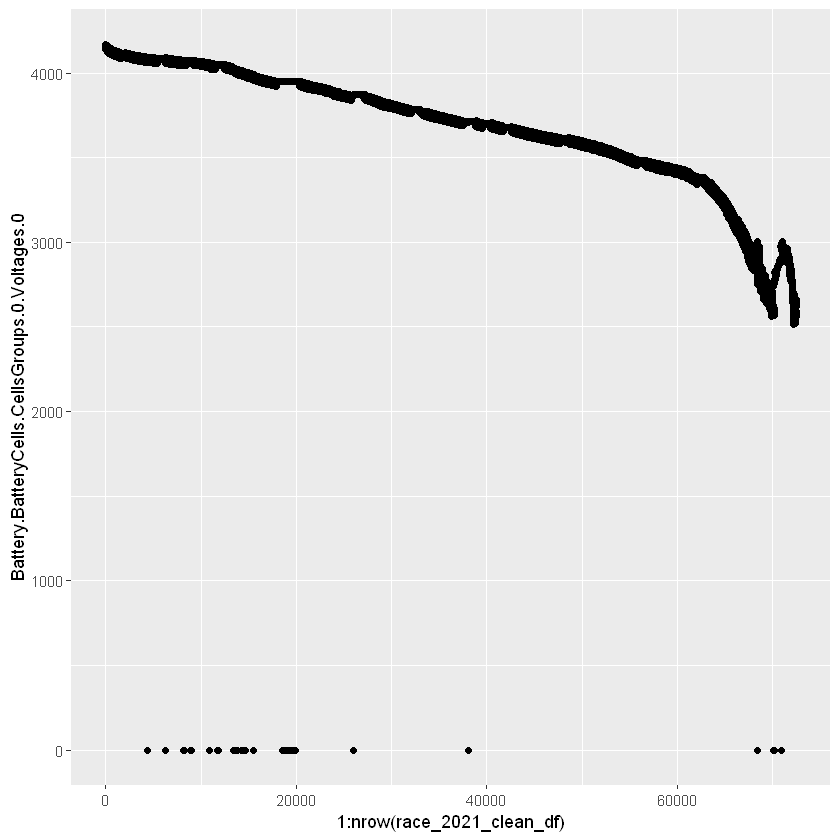

In [168]:
qplot(x=1:nrow(race_2021_clean_df), y=Battery.BatteryCells.CellsGroups.0.Voltages.0, data = race_2021_clean_df, geom = c("point"))

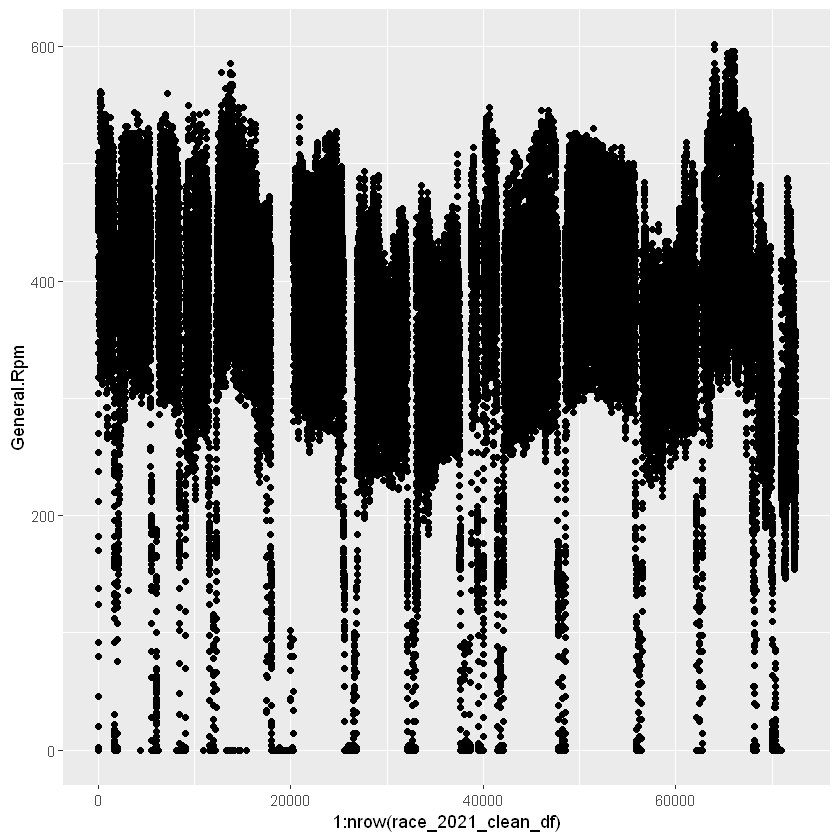

In [169]:
qplot(x=1:nrow(race_2021_clean_df), y=General.Rpm, data = race_2021_clean_df, geom = c("point"))

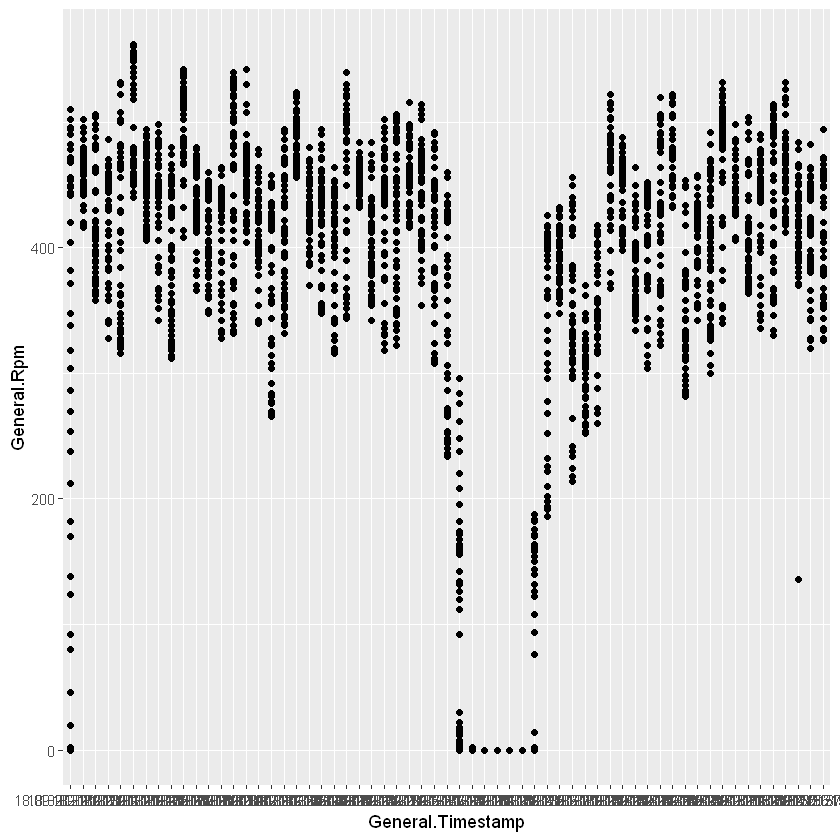

In [176]:
qplot(x=General.Timestamp, y=General.Rpm, data = race_2021_clean_df[1:3300,], geom = c("point"))
#from first 3300 rows so 1 hour of driving and staying in a pit

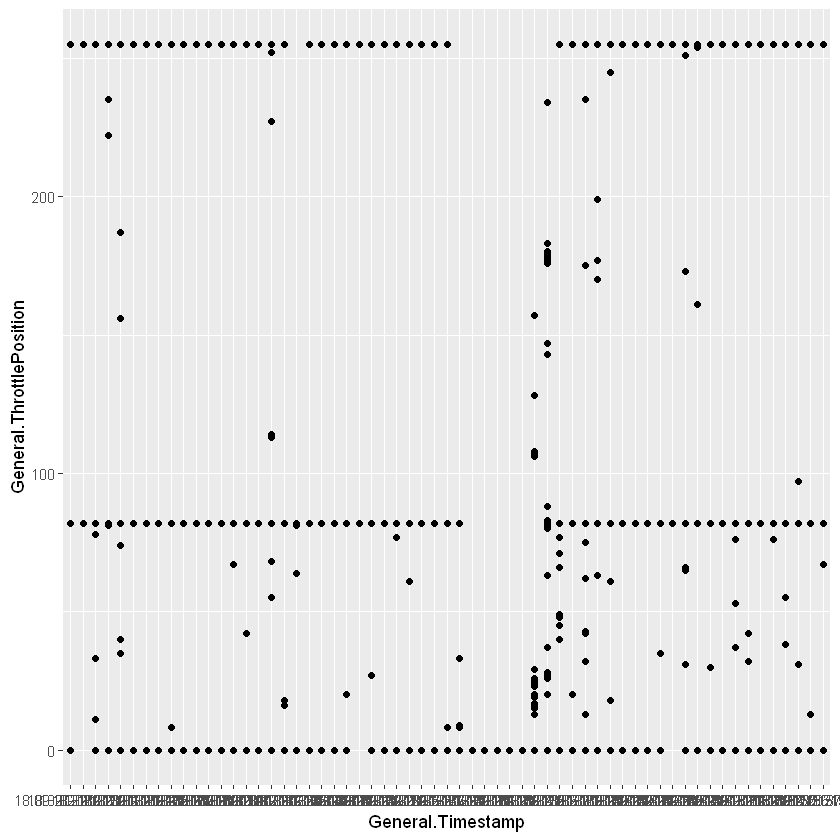

In [184]:
qplot(x=General.Timestamp, y=General.ThrottlePosition, data = race_2021_clean_df[1:3300,], geom = c("point"))
#from first 3300 rows so 1 hour of driving and staying in a pit
# lower constant level means ECO-Full throttle; high levels are POWER-Full Throttle

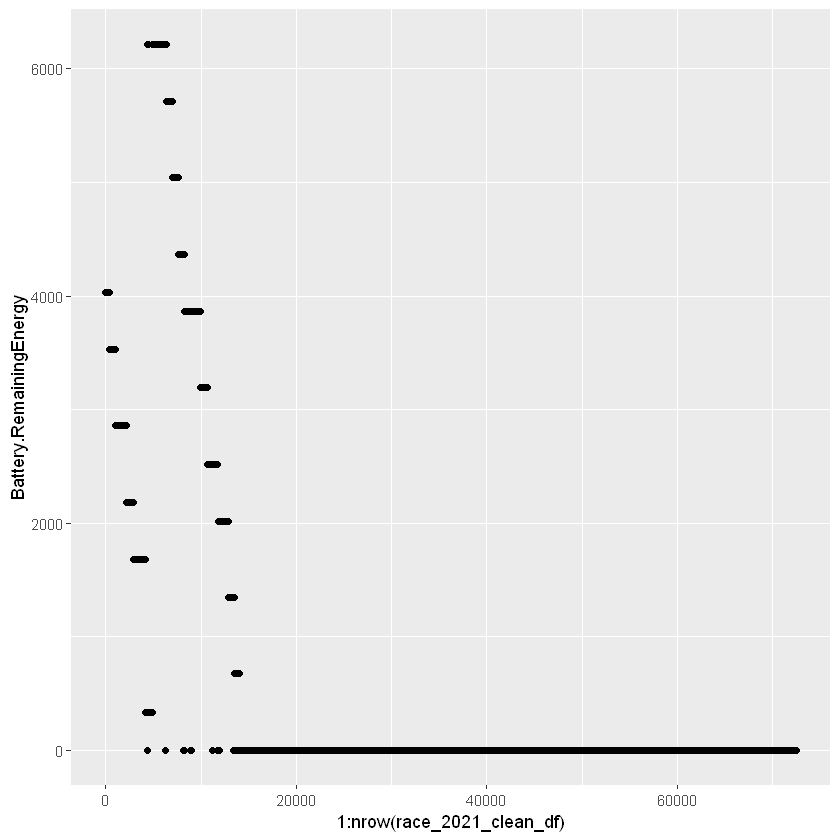

In [187]:
qplot(x=1:nrow(race_2021_clean_df), y=Battery.RemainingEnergy, data = race_2021_clean_df, geom = c("point"))

In [162]:
head(race_2021_clean_df$newtimestamp)

[1] NA NA NA NA NA NA

In [ ]:
qplot(x=General.Timestamp, y=Battery.RemainingEnergy, data = race_2021_clean_df[1:3300,], geom = c("point"))